In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [55]:
df_=pd.read_csv('/content/supermarket_sales.csv')
df_

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [56]:
df_.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [57]:
df=pd.DataFrame({'Branch':df_['Branch'],'Gender':df_['Gender'],'Product':df_['Product line'],'Total':df_['Total'],'Paymnet':df_['Payment'],})
df['Customer type']=df_['Customer type']
df

,Branch,Gender,Product,Total,Paymnet,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


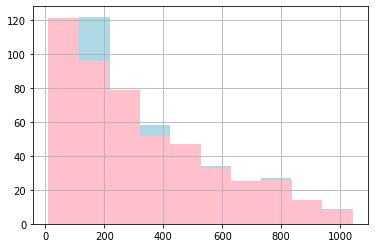

In [58]:
members =df.loc[df['Customer type']=='Member']
memberstot =members['Total']
normal =df.loc[df['Customer type']=='Normal']
normaltot =normal['Total']
normaltot.hist(color='lightblue')
memberstot.hist(color='pink')

In [59]:
# H0: Members and Normal Cutomers Avg total are same.
# Ha: Normal Customers average total is less than members.

In [60]:
df.groupby('Customer type').mean()

,Total
Customer type,
Member,327.791305
Normal,318.122856


In [61]:
means=df.groupby('Customer type').mean()

In [62]:
difference=means['Total'][0]-means['Total'][1]
observed_difference=difference
observed_difference

9.668449677798662

In [63]:
df.iloc[123]

Branch                            C
Gender                         Male
Product          Home and lifestyle
Total                       536.844
Paymnet                 Credit card
Customer type                Member
Name: 123, dtype: object

In [64]:
randomsamples=df.sample(1000,replace=False)
randomsamples

,Branch,Gender,Product,Total,Paymnet,Customer type
540,A,Male,Home and lifestyle,96.6420,Ewallet,Normal
458,C,Female,Electronic accessories,488.9850,Cash,Member
905,C,Female,Home and lifestyle,329.1960,Cash,Member
266,C,Male,Home and lifestyle,148.9740,Credit card,Normal
542,B,Female,Sports and travel,84.7560,Credit card,Member
...,...,...,...,...,...,...
899,A,Male,Food and beverages,331.1280,Ewallet,Member
850,A,Male,Fashion accessories,77.8050,Cash,Normal
448,B,Female,Health and beauty,28.4235,Credit card,Member
556,B,Female,Fashion accessories,151.2840,Cash,Member


In [65]:
randomsamples['Total']

540     96.6420
458    488.9850
905    329.1960
266    148.9740
542     84.7560
         ...   
899    331.1280
850     77.8050
448     28.4235
556    151.2840
79     106.9950
Name: Total, Length: 1000, dtype: float64

In [66]:
original_shuffled=df.copy()
original_shuffled

,Branch,Gender,Product,Total,Paymnet,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


In [67]:
original_shuffled['shuffled']=randomsamples['Total'].values
original_shuffled

,Branch,Gender,Product,Total,Paymnet,Customer type,shuffled
0,A,Female,Health and beauty,548.9715,Ewallet,Member,96.6420
1,C,Female,Electronic accessories,80.2200,Cash,Normal,488.9850
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal,329.1960
3,A,Male,Health and beauty,489.0480,Ewallet,Member,148.9740
4,A,Male,Sports and travel,634.3785,Ewallet,Normal,84.7560
...,...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal,331.1280
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal,77.8050
997,A,Male,Food and beverages,33.4320,Cash,Member,28.4235
998,A,Male,Home and lifestyle,69.1110,Cash,Normal,151.2840


In [68]:
original_shuffled.columns

Index(['Branch', 'Gender', 'Product', 'Total', 'Paymnet', 'Customer type',
       'shuffled'],
      dtype='object')

In [70]:
original_shuffled.drop(['Branch', 'Gender', 'Product','Paymnet'], axis=1,inplace=True)
original_shuffled

,Total,Customer type,shuffled
0,548.9715,Member,96.6420
1,80.2200,Normal,488.9850
2,340.5255,Normal,329.1960
3,489.0480,Member,148.9740
4,634.3785,Normal,84.7560
...,...,...,...
995,42.3675,Normal,331.1280
996,1022.4900,Normal,77.8050
997,33.4320,Member,28.4235
998,69.1110,Normal,151.2840


In [71]:
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled
Customer type,,
Member,327.791305,329.730892
Normal,318.122856,316.175495


In [72]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

13.555397225588933

In [74]:
original = df_[['Customer type', 'Total']]
shuffled = original.sample(1000,replace = False)
shuffled_total = shuffled['Total']
original_shuffled = original.assign(shuffled_total=shuffled_total.values )
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled_total
Customer type,,
Member,327.791305,316.445542
Normal,318.122856,329.514093


In [75]:
# MULTIPLE SAMPLES
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = df_[['Customer type', 'Total']]
    shuffled = original.sample(1000,replace = False)
    shuffled_total = shuffled['Total']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('Customer type').mean()
    difference = group_means['shuffled_total'][0]- group_means['shuffled_total'][1]
    differences[i] = difference

In [76]:
differences_df=pd.DataFrame(differences)
differences_df

,0
0,-8.088255
1,34.954525
2,12.094085
3,23.199938
4,-7.669640
...,...
4995,-16.111715
4996,12.638954
4997,19.900027
4998,16.951951


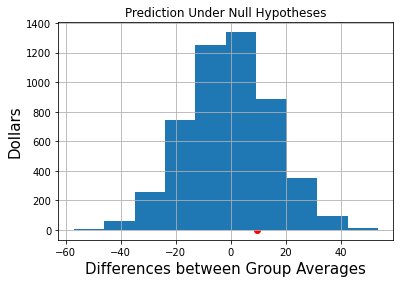

In [77]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

In [78]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.738